In [1]:
from src.loader import InstanceLoader
t = InstanceLoader(data_folder="/Users/persie/PhD_Code/3d_ant_data_rle/", session_number=6, skeleton_toml_path="skeleton.toml", obj_ref_frame=500, prefix="240905-1616")

In [2]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list)
ground_box = g.get_ground_collision()

In [3]:
t.animal_list.pre_load_ray()

In [3]:
from src.collision import CollisionDetector
from src.animal import AnimalList

c = CollisionDetector(animal_list=AnimalList(animals=[t.animal_list.animal('track27')]), obj_list=t.obj_list, node_of_interest=['a_L2', 'a_R2'])

In [4]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list)
g.visualise_bounding_box()


In [7]:
from src.visual_widget import MultiViewer
V = MultiViewer(t.animal_list, t.obj_list, 0, fps=20, hold_window=20, auto_play=True, axis=g.tform)


AttributeError: 'NoneType' object has no attribute '_nscontext'

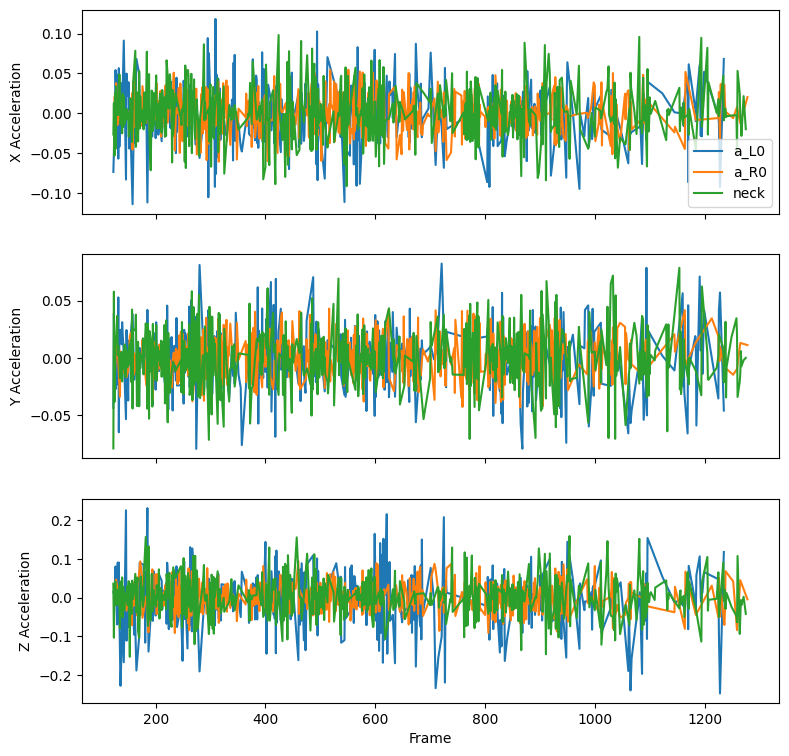

In [8]:
from scripts.tools.x_y_z_plot import KPPositionXYZ, KPVelocityXYZ, KPAccelerationXYZ, KPDisplaceMag, KPVelocityMag, \
    KPAccelerationMag, KPDisplaceXYZ

# KP = KPPosition(t.animal_list.animals[15], node=['a_L0', 'a_R0', 'neck'])
KP = KPAccelerationXYZ(t.animal_list.animal('1'), node=['a_L0', 'a_R0', 'neck'], filter_for_outlier=True)

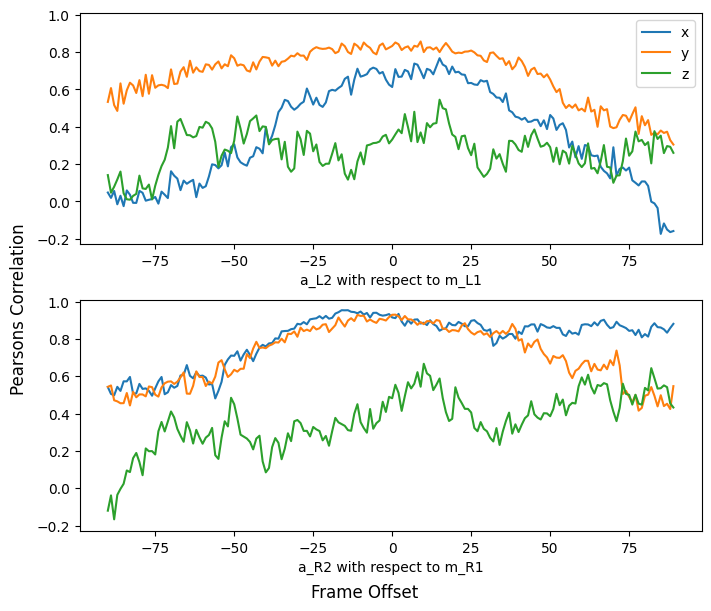

In [4]:
from scripts.tools.time_correlation import CorrelationPlot

plo = CorrelationPlot(t.animal_list.animal('track27'), [('m_L1', 'a_L2'), ('m_R1', 'a_R2')], (-90,90))

In [3]:
from scripts.tools.animal_dataframe import AnimalDataFrame
adf = AnimalDataFrame(t.animal_list.animal('track27'))

/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/filterpy/common/helpers.py:364: SyntaxWarning: invalid escape sequence '\S'
  """


In [4]:
position_df = adf.position_xyz(clean=True)

In [25]:
position_df.loc['a_R0'] - position_df.loc['a_L0']

,1503,1504,1505,1506,1508,1510,1511,1512,1513,1514,...,3962,3963,3964,3965,3966,3967,3968,3969,3970,3972
Axis,,,,,,,,,,,,,,,,,,,,,
x,0.469025,0.519866,0.480167,0.487865,0.465192,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,-0.485648,-0.517264,-0.485699,-0.533359,-0.523132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z,0.069876,0.124087,0.127697,0.103556,0.081451,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

from scripts.tools.animal_dataframe import AnimalDataFrame

adf = AnimalDataFrame(t.animal_list.animal('track27'))


/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/filterpy/common/helpers.py:364: SyntaxWarning: invalid escape sequence '\S'
  """


In [4]:
keypoints_final = adf.post_process()

 Optimising Bone Length |█████████████▎⚠︎                         | (!) 815/2467 ████                                    | ▆▄▂ 243/2467 |████▊                                   | ▇▇▅ 295/2467 |██████▍                                 | ▂▂▄ 397/2467 |██████████▉                             | ▃▁▃ 668/2467 |███████████                             | ▂▄▆ 680/2467 


KeyboardInterrupt: 

In [5]:
keypoints_final.to_pickle('./post_process_session28_track27.pkl')

In [ ]:
import pandas as pd
keypoints_final = pd.read_pickle('./post_process_session28_track27.pkl')

In [6]:
animal_27 = t.animal_list.animal('track27')
animal_27.update_from_df(keypoints_final)

In [7]:
from src.visual_widget import MultiViewer
from src.animal import AnimalList
a_l = AnimalList([animal_27])
V = MultiViewer(a_l, t.obj_list, 0, fps=30, hold_window=20)

KeyboardInterrupt: 